In [1]:
%matplotlib inline
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd
import librosa, librosa.display

In [2]:
x, sr = librosa.load('audio/c_strum.wav')
ipd.Audio(x, rate=sr)

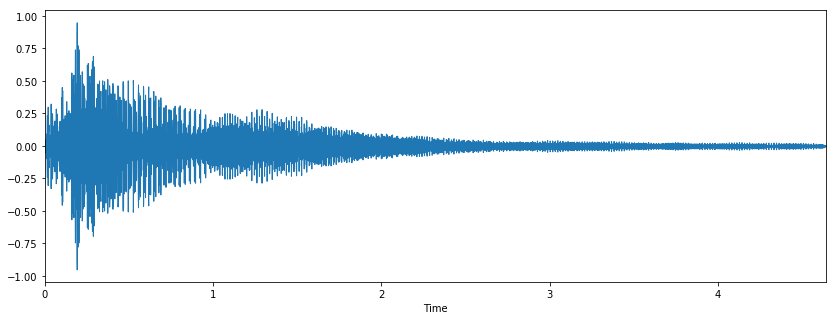

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr)

In [4]:
# Because the autocorrelation produces a symmetric signal, we only care about the "right half".
r = numpy.correlate(x, x, mode='full')[len(x)-1:]
print(x.shape, r.shape)

(102400,) (102400,)


(0, 10000)

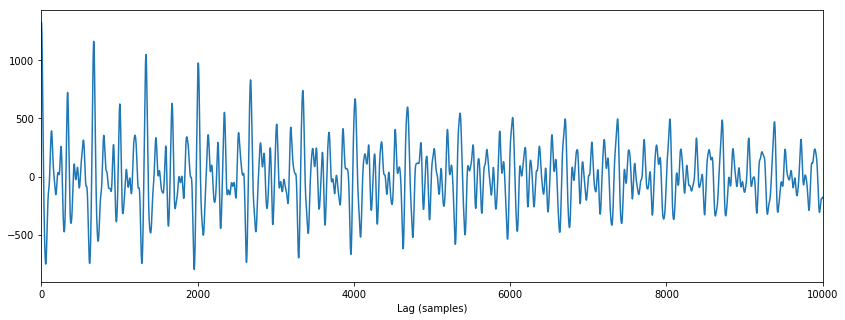

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(r[:10000])
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

In [6]:
r = librosa.autocorrelate(x, max_size=10000)
print(r.shape)

(10000,)


(0, 10000)

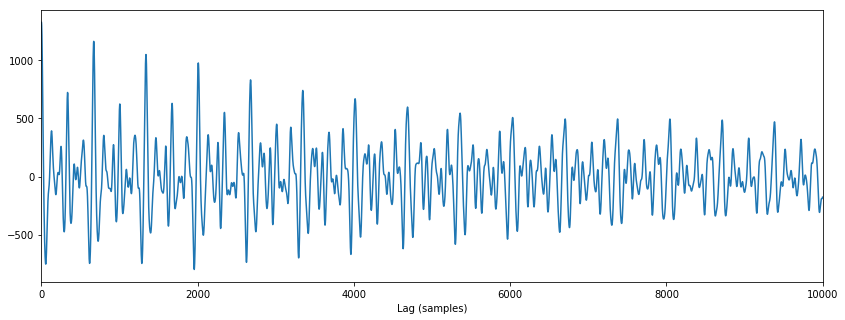

In [7]:
plt.figure(figsize=(14, 5))
plt.plot(r)
plt.xlabel('Lag (samples)')
plt.xlim(0, 10000)

In [8]:
x, sr = librosa.load('audio/oboe_c6.wav')
ipd.Audio(x, rate=sr)

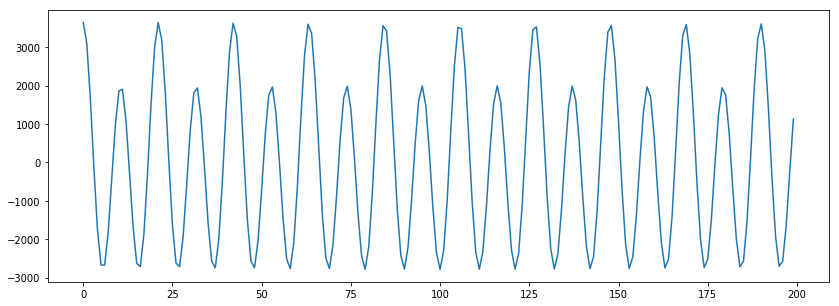

In [9]:
r = librosa.autocorrelate(x, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])

In [10]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

In [11]:
print(f_lo, f_hi)
print(t_lo, t_hi)

16.351597831287414 8372.018089619156
2.633773573344376 1348.4920695523206


In [12]:
r[:int(t_lo)] = 0
r[int(t_hi):] = 0

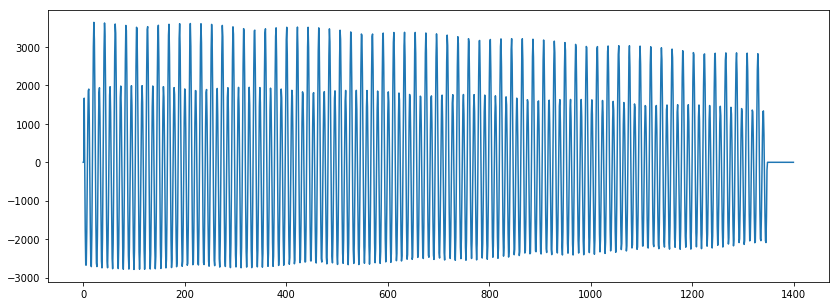

In [13]:
plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

In [14]:
t_max = r.argmax()
print(t_max)

21


In [15]:
float(sr)/t_max

1050.0

In [16]:
librosa.midi_to_hz(84)

1046.5022612023945